In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
from utils import OptimizedControlResults
import pandas as pd
import numpy as np
import sympy
from sympy.utilities.lambdify import lambdify
# import mplhep
# plt.style.use(mplhep.style.ATLAS)

In [2]:
# optimizer_dir = Path('simulation_results/2025-06-02_19-48-08') # Discrete - High infra costs, constant lambda
# optimizer_dir = Path('simulation_results/2025-06-02_19-48-52') # Discrete - High wait time cost, constant lambda
# optimizer_dir = Path('simulation_results/2025-06-02_19-51-12') # Discrete - High customer revenue, constant lambda
# optimizer_dir = Path('simulation_results/2025-06-02_20-15-13') # Discrete - High customer revenue, quick gaussian lambda
# optimizer_dir = Path('simulation_results/2025-06-02_20-48-48') # Discrete - High customer revenue, slow gaussian lambda
# optimizer_dir = Path('simulation_results/2025-06-03_23-24-43') # Continuous - High customer revenue, constant lambda
# optimizer_dir = Path('simulation_results/2025-06-04_00-10-49') # Continuous - High infra costs, constant lambda
results_dir = Path('simulation_results/job_3') # Continuous - High customer revenue, constant lambda

# optimizer = Optimizer.from_dir(optimizer_dir)
# simulation_df = optimizer.get_sim('best')
optimized_control_results = OptimizedControlResults.from_json(results_dir / 'optimization_results.json')
simulation_df = pd.read_parquet(results_dir / f'simulation_{optimized_control_results.best_iteration:03d}.parquet')
for col_name, dtype in simulation_df.dtypes.items():
    print(f"{col_name}: {dtype}")
markevery=500

time: float64
arrival_rate: float64
estimated_arrival_rate: float64
effective_arrival_rate: float64
desired_service_rate: float64
cloud_service_rate: float64
deploy_service_rate: float64
cost: float64
revenue: float64
profit: float64
expected_queue_size: float64
expected_wait_time: float64
integrated_cost: float64
integrated_revenue: float64
integrated_profit: float64
queue_size_prob_0: float64
queue_size_prob_1: float64
queue_size_prob_2: float64
queue_size_prob_3: float64
queue_size_prob_4: float64
queue_size_prob_5: float64
queue_size_prob_6: float64
queue_size_prob_7: float64
queue_size_prob_8: float64
queue_size_prob_9: float64
queue_size_prob_10: float64
queue_size_prob_11: float64
queue_size_prob_12: float64
queue_size_prob_13: float64
queue_size_prob_14: float64
queue_size_prob_15: float64
queue_size_prob_16: float64
queue_size_prob_17: float64
queue_size_prob_18: float64
queue_size_prob_19: float64
queue_size_prob_20: float64
queue_size_prob_21: float64
queue_size_prob_22: flo

In [3]:
def add_hyperparameters(ax):
    best_controller_params_txt = ', '.join(f'{p:.4f}' for p in optimized_control_results.best_controller_params)
    lines = ax.plot([], [], ' ', label=f'Best Params = [{best_controller_params_txt}]')
    lines += ax.plot([], [], ' ', label=f'Profit = {-optimized_control_results.best_cost:.4f}')
    initial_controller_params_txt = ', '.join(f'{p:.2f}' for p in optimized_control_results.initial_controller_params)
    lines += ax.plot([], [], ' ', label=f'Initial Params = [{initial_controller_params_txt}]')
    lines += ax.plot([], [], ' ', label=f'Queue Size = {optimized_control_results.queue_size}')
    lines += ax.plot([], [], ' ', label=f'Cloud Service Rate Cost = {optimized_control_results.cloud_service_rate_cost:.2f}')
    lines += ax.plot([], [], ' ', label=f'Effective Arrival Penalty = {optimized_control_results.effective_arrival_rate_penalty:.2f}')
    lines += ax.plot([], [], ' ', label=f'Arrival Revenue = {optimized_control_results.arrival_rate_revenue:.2f}')
    lines += ax.plot([], [], ' ', label=f'Seconds = {optimized_control_results.seconds:.2f}')
    return lines

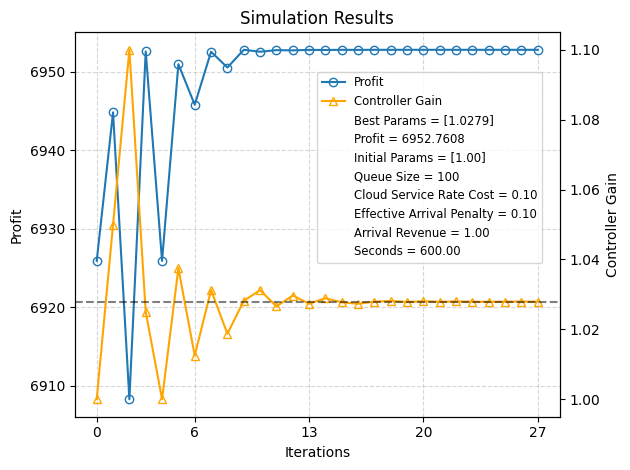

In [4]:
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=0.5)
lines = ax.plot(-optimized_control_results.costs, label='Profit',
                markerfacecolor='None', marker='o')
twinx = ax.twinx()
lines += twinx.plot(optimized_control_results.controller_params[:, 0],
                    label='Controller Gain', color='orange',
                    marker='^', markerfacecolor='None')
twinx.axhline(optimized_control_results.best_controller_params[0], linestyle='--', color='k', alpha=.5)
ax.set(
    title='Simulation Results',
    xlabel='Iterations',
    ylabel='Profit',
    xticks=np.linspace(0, len(optimized_control_results.costs) - 1, 5,
                       dtype=int),
)
twinx.set_ylabel('Controller Gain')
lines += add_hyperparameters(ax)
ax.legend(lines, [line.get_label() for line in lines],
          ncol=1, fontsize='small', loc=(0.5, 0.4))
fig.tight_layout()
fig.savefig(results_dir / 'simulation_progression.png', dpi=300)

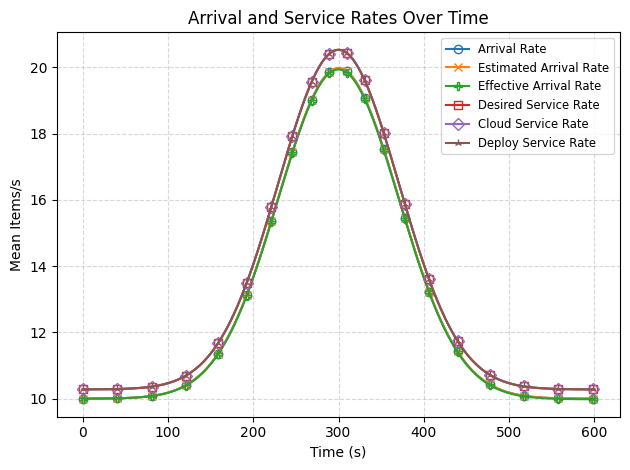

In [5]:
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=.5)
ax.plot(simulation_df['time'], simulation_df['arrival_rate'], label='Arrival Rate',
        marker='o', markevery=markevery, markerfacecolor='None')
ax.plot(simulation_df['time'], simulation_df['estimated_arrival_rate'], label='Estimated Arrival Rate',
        marker='x', markevery=markevery, markerfacecolor='None')
ax.plot(simulation_df['time'], simulation_df['effective_arrival_rate'], label='Effective Arrival Rate',
        marker='P', markevery=markevery, markerfacecolor='None')
ax.plot(simulation_df['time'], simulation_df['desired_service_rate'], label='Desired Service Rate',
        marker='s', markevery=markevery, markerfacecolor='None')
ax.plot(simulation_df['time'], simulation_df['cloud_service_rate'], label='Cloud Service Rate',
        marker='D', markevery=markevery, markerfacecolor='None')
ax.plot(simulation_df['time'], simulation_df['deploy_service_rate'], label='Deploy Service Rate',
        marker='2', markevery=markevery, markerfacecolor='None')
# add_hyperparameters(ax)
ax.legend(fontsize='small', ncol=1)
ax.set(
    xlabel='Time (s)',
    ylabel='Mean Items/s',
    title='Arrival and Service Rates Over Time'
)
fig.tight_layout()
fig.savefig(results_dir / 'producer_consumer_lambda.png', dpi=300)

/tmp/ipykernel_218252/1893540904.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend(fontsize='small', ncol=2)


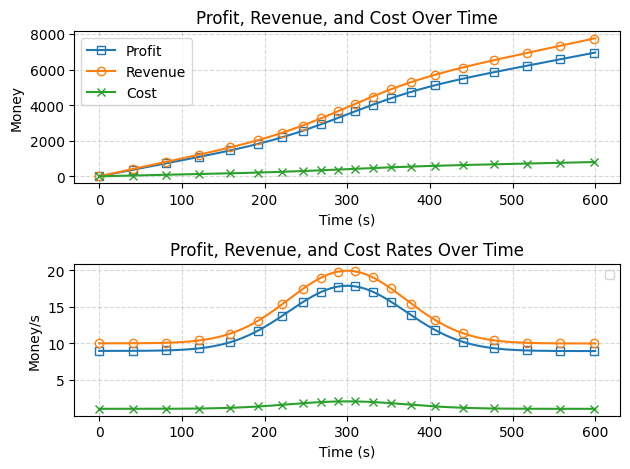

In [6]:
fig, ax = plt.subplots(2, 1)
ax[0].grid(linestyle='--', alpha=.5)
profit_line = ax[0].plot(simulation_df['time'], simulation_df['integrated_profit'], label='Profit',
                         marker='s', markevery=markevery, markerfacecolor="None")
revenue_line = ax[0].plot(simulation_df['time'], simulation_df['integrated_revenue'], label='Revenue',
                          marker='o', markevery=markevery, markerfacecolor="None")
cost_line = ax[0].plot(simulation_df['time'], simulation_df['integrated_cost'], label='Cost',
                       marker='x', markevery=markevery)
ax[0].legend()
ax[0].set(
    xlabel='Time (s)',
    ylabel='Money',
    title='Profit, Revenue, and Cost Over Time'
)
ax[1].grid(linestyle='--', alpha=.5)
ax[1].plot(simulation_df['time'], simulation_df['profit'], color=profit_line[0].get_color(),
           marker=profit_line[0].get_marker(), markevery=markevery,
           markerfacecolor=profit_line[0].get_markerfacecolor())
ax[1].plot(simulation_df['time'], simulation_df['revenue'], color=revenue_line[0].get_color(),
           marker=revenue_line[0].get_marker(), markevery=markevery,
           markerfacecolor=revenue_line[0].get_markerfacecolor())
ax[1].plot(simulation_df['time'], simulation_df['cost'], color=cost_line[0].get_color(),
           marker=cost_line[0].get_marker(), markevery=markevery,
           markerfacecolor=cost_line[0].get_markerfacecolor())
ax[1].set(ylabel='Money/s',
          xlabel='Time (s)',
          title='Profit, Revenue, and Cost Rates Over Time')
# add_hyperparameters(ax[1])
ax[1].legend(fontsize='small', ncol=2)
fig.tight_layout()
fig.savefig(results_dir / 'money_over_time.png', dpi=300)

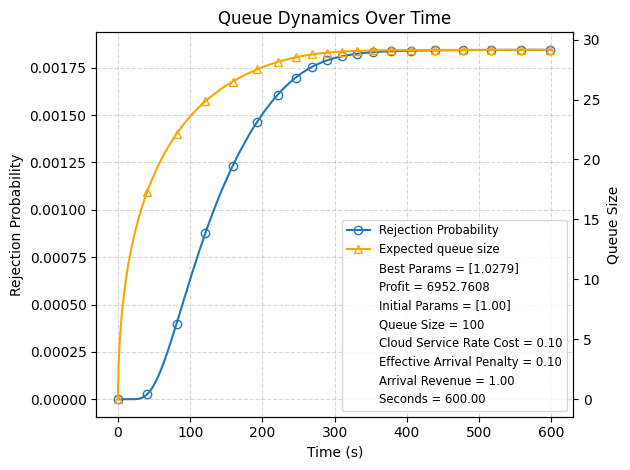

In [7]:
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=.5)
lines = ax.plot(simulation_df['time'], simulation_df['queue_size_prob_100'], label='Rejection Probability',
                marker='o', markevery=markevery, markerfacecolor='None')
ax.set(
    xlabel='Time (s)',
    ylabel='Rejection Probability',
    title='Queue Dynamics Over Time'
)
twinx = ax.twinx()
lines += twinx.plot(simulation_df['time'], simulation_df['expected_queue_size'], label='Expected queue size',
                    color='orange', marker='^', markevery=markevery, markerfacecolor='None')
lines += add_hyperparameters(ax)
twinx.set_ylabel('Queue Size')
ax.legend(lines, [line.get_label() for line in lines],
          ncol=1, fontsize='small')
fig.tight_layout()
fig.savefig(results_dir / 'queue_dynamics.png', dpi=300)